## Laboratorium 6


### Zbiór danych

Zbiór danych znajduje się w katalogu `dataset/*`. Jest to zmodyfikowany zbiór danych znajdujący się pod adresem: <https://archive.ics.uci.edu/ml/datasets/leaf>.

### Przesyłanie zadań

Wszystkie pliki należy spakować archiwizatorem **zip** i przesłać za pośrednictwem platformy WIKAMP. Poniżej oczekiwana zawartość archiwum:

```
+-- 📂 [IMIE.NAZWISKO].zip
    +-- 📜 Lab[xx].ipynb
    +-- 📂 dataset
        +-- 📜 dataset.npz
        +-- 📜 ReadMe.pdf
```


### Zadanie 1

* Wybierz 10 pierwszych gatunków liści (będziesz je używać w kolejnych zadaniach), o identyfikatorach: 1, 2, 3, 4, 5, 6, 7, 8, 9, 10.
* Znormalizuj dane w zakresie 0-1.
* Wybierz 2 najlepsze cechy.

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_classif
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

with open('./dataset/dataset.npz', 'rb') as f:
    data = np.load(f)
    train, test = data['train'], data['test']

classes = range(1,11)
train = train[np.isin(train[:, 0], classes)]
test = test[np.isin(test[:, 0], classes)]

y_train = train[:,0]
X_train = train[:,2:]
y_test = test[:,0]
X_test = test[:,2:]

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

selector = SelectKBest(score_func=f_classif, k=2)
selector.fit(X_train, y_train)
scores = pd.Series(selector.scores_)
best_features = scores.nlargest(2).index.tolist()
print(best_features)

X_train = X_train[:,best_features]
X_test = X_test[:,best_features]

[1, 6]


### Zadanie 2

(kontynuacja zadania 1)

* Przeprowadź klasteryzację zbioru za pomocą metody [$k$-średnich](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html).
* Korzystając z metody łokcia, wybierz liczbę klastrów ($c$).
* Podziel zbiór na $c$ klastrów.
* Wyświetl wyniki klasteryzacji dla $c$ klastrów w postaci wykresu.

> Dla chętnych: zaimplementować samodzielnie metodę k-średnich i wyświetlić kolejne kroki klasteryzacji.

[51.357657869281496, 32.815996278647546, 13.30618056629237, 7.085767628941923, 4.899912942151118, 3.7345466009918944, 2.9758287512894332, 2.3970061181202293, 2.232414356798925, 1.931197850955745]


C:\Users\jasin\anaconda3\envs\swad2025\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\jasin\anaconda3\envs\swad2025\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\jasin\anaconda3\envs\swad2025\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\jasin\anaconda3\envs\swad2025\lib\site-packages\sklearn\cluster\_kmeans.py:1436: User

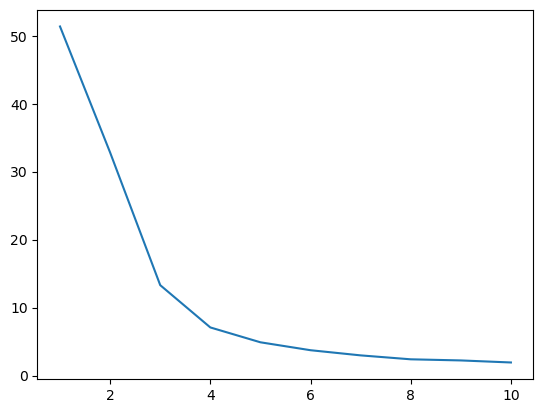

In [2]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, n_init='auto', random_state=42)
    kmeans.fit(X_train)
    inertia.append(kmeans.inertia_)

print(inertia)
plt.plot(list(range(1,11)), inertia)

In [12]:
optimal_k = 3 ## wynik z wykresu

kmeans = KMeans(n_clusters=optimal_k, n_init='auto', random_state=42)
clusters = kmeans.fit_predict(X_train)
clusters_column = clusters.reshape(-1, 1)
X_train = np.hstack((X_train, clusters_column))

centroids = kmeans.cluster_centers_
print(X_train)
print(f"Centroidy: {centroids}")

[[0.28519044 0.52182543 1.         1.         1.        ]
 [0.23646382 0.30598881 0.         0.         0.        ]
 [0.19538916 0.02969887 0.         0.         0.        ]
 ...
 [0.22837994 0.21771926 0.         0.         0.        ]
 [0.05327831 0.15560815 0.         0.         0.        ]
 [0.10427862 0.14528041 0.         0.         0.        ]]
Centroidy: [[1.43351092e-01 1.73171417e-01 3.05311332e-16 3.05311332e-16]
 [1.14920162e-01 7.74011756e-01 1.00000000e+00 1.00000000e+00]
 [9.33730555e-01 1.57212709e-01 2.00000000e+00 2.00000000e+00]]


C:\Users\jasin\anaconda3\envs\swad2025\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


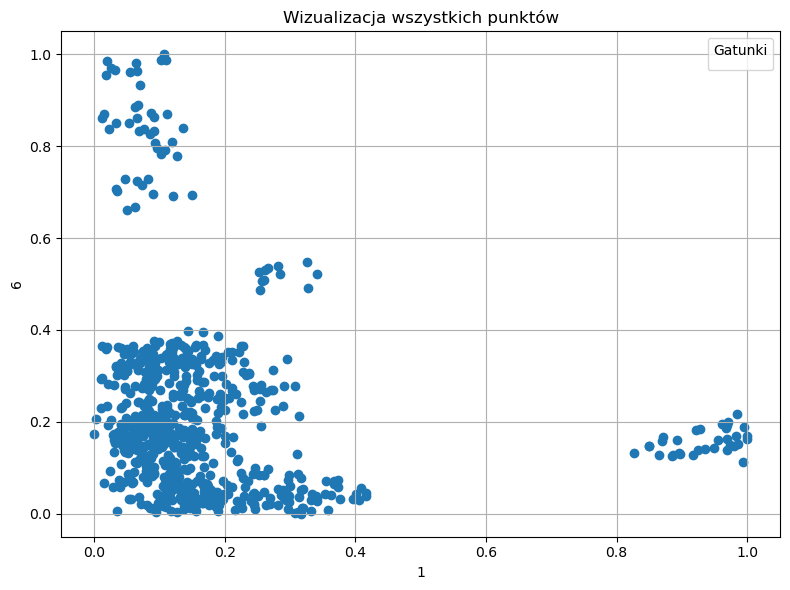

In [8]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_train[:,0], X_train[:,1])
plt.xlabel(best_features[0])
plt.ylabel(best_features[1])
plt.title('Wizualizacja wszystkich punktów')
plt.legend(*scatter.legend_elements(), title="Gatunki")
plt.grid(True)

plt.tight_layout()

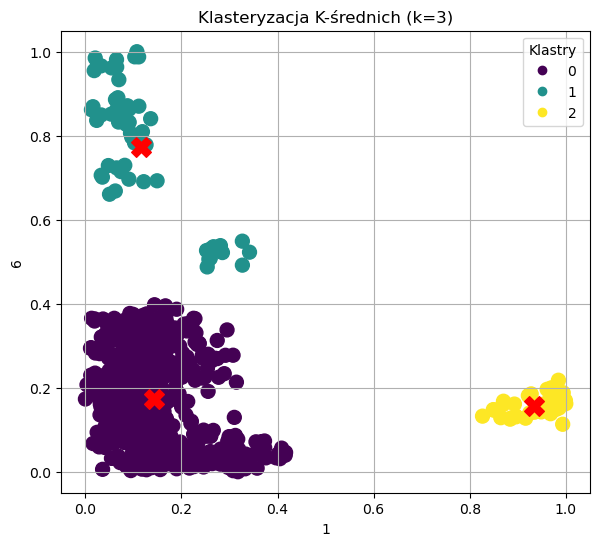

In [11]:
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 2)
scatter = plt.scatter(X_train[:, 0], X_train[:, 1], c=X_train[:,-1], cmap='viridis', s=100)
plt.xlabel(best_features[0])
plt.ylabel(best_features[1])
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroidy')
plt.title(f'Klasteryzacja K-średnich (k={optimal_k})')
plt.legend(*scatter.legend_elements(), title="Klastry")
plt.grid(True)